## Atelier Adaboost


### Contexte: 
Nous souhaitons mettre en place un modèle approprié permettant d'identifier si le client de la banque est dépositaire ou non.
### Description du Dataset
Notre Dataset 'bank_full.csv' contient des informations sur tous les clients de la banque. 
La dataset contient 16 variables indépendantes ( age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, compaign, pdays, previous, poutcome) et une variable dépendante (cible).
Il existe de nombreuses colonnes qui ne sont pas numériques.

In [2]:
# Importer les libraries
#For numerical libraries
import numpy as np

#To handle data in the form of rows and columns
import pandas as pd

#importing seaborn for statistical plots
import seaborn as sns

#importing ploting libraries
import matplotlib.pyplot as plt

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier


#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn import metrics

#Import the Voting classifier for Ensemble
from sklearn.ensemble import VotingClassifier

### Load Dataset

In [3]:
# Importer le dataset
bank_data=pd.read_csv('bank-full.csv')

In [4]:
#Visualiser les 5 premiers
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Visualiser les derniers enregistrements
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Exploration des données

In [6]:
# demensions
bank_data.shape

(45211, 17)

In [9]:
# Analyse descriptive du dataset
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


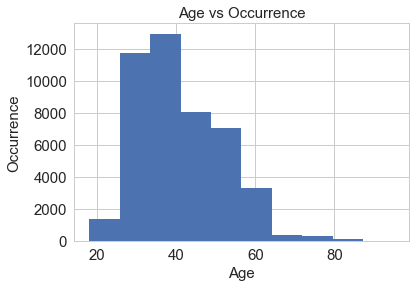

In [13]:
#histogram age
plt.hist(bank_data['age'])
plt.xlabel('Age', fontsize=15)
plt.ylabel('Occurrence', fontsize=15)
plt.title('Age vs Occurrence', fontsize=15)
plt.tick_params(labelsize=15)


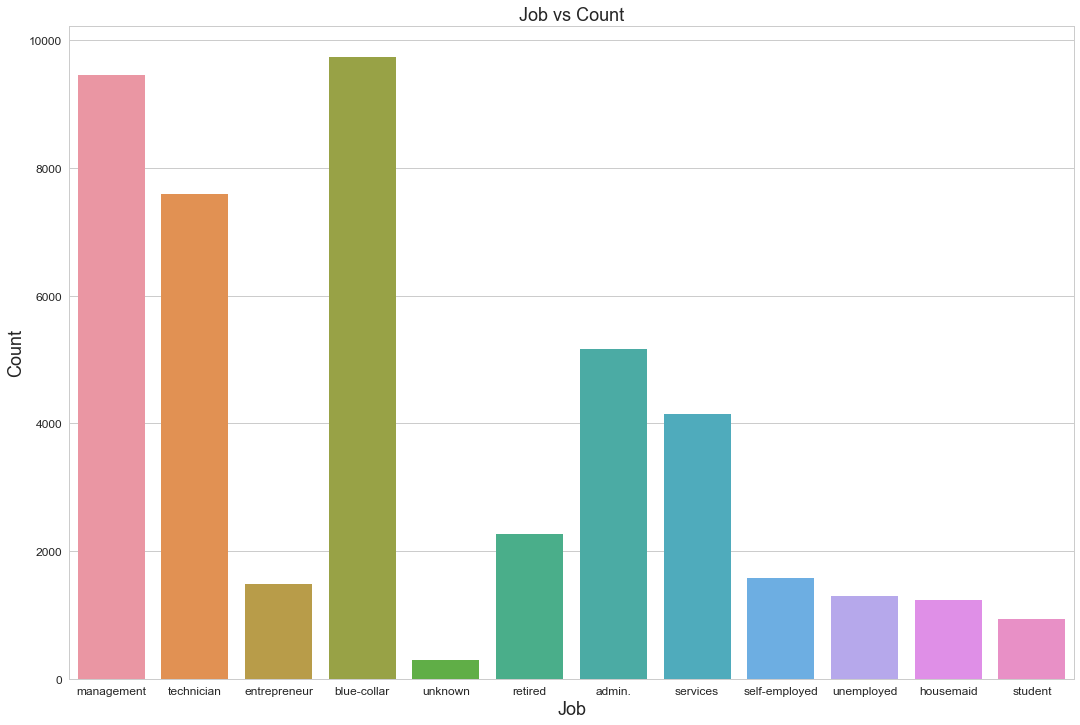

In [26]:
#countplot job
sns.countplot(bank_data['job'],data=bank_data)
plt.rcParams["figure.figsize"] = (18,12)
plt.xlabel('Job', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Job vs Count', fontsize=18)
plt.tick_params(labelsize=12)

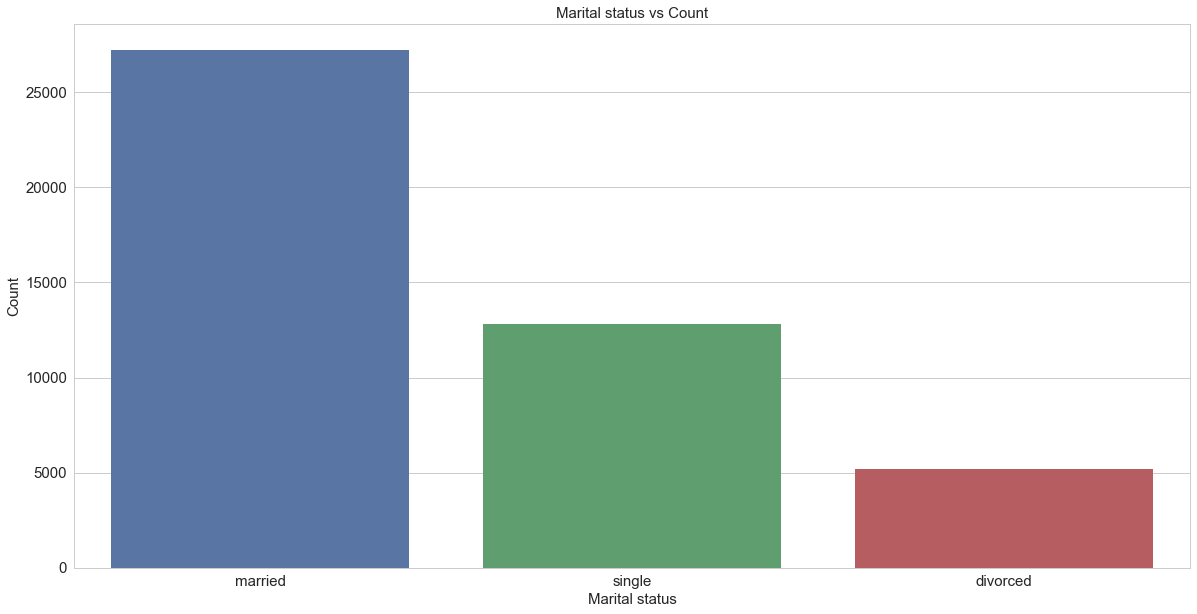

In [30]:
#countplot Marital status
sns.countplot(bank_data['marital'],data=bank_data)
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Marital status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital status vs Count', fontsize=15)
plt.tick_params(labelsize=15)

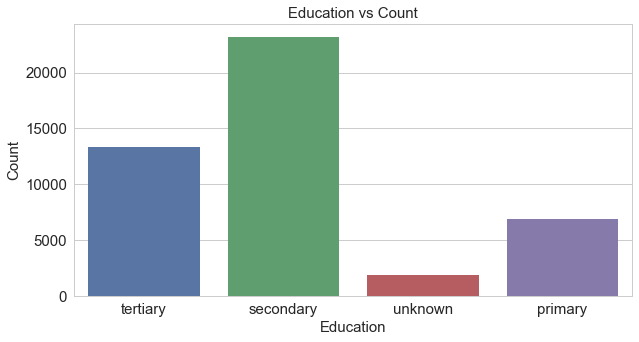

In [31]:
#countplot education level
fig, ax=plt.subplots()
fig.set_size_inches(10,5)


sns.countplot(bank_data['education'],data=bank_data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education vs Count', fontsize=15)
ax.tick_params(labelsize=15)

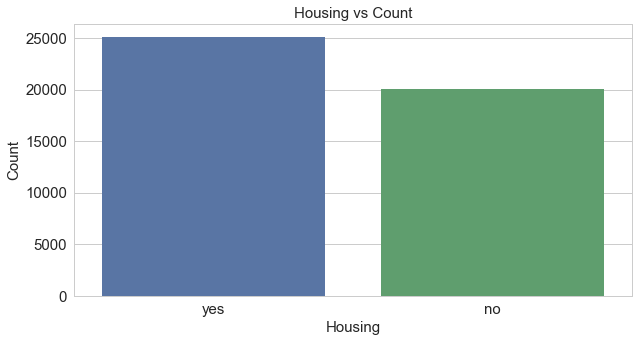

In [32]:
#countplot housing
fig, ax=plt.subplots()
fig.set_size_inches(10,5)


sns.countplot(bank_data['housing'],data=bank_data)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing vs Count', fontsize=15)
ax.tick_params(labelsize=15)

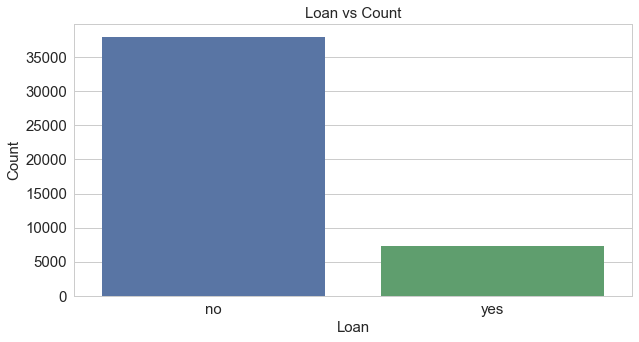

In [33]:
#countplot loan
fig, ax=plt.subplots()
fig.set_size_inches(10,5)


sns.countplot(bank_data['loan'],data=bank_data)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [34]:
#Encoding of categorical variables

labelencoder_X=LabelEncoder()
bank_data['job']=labelencoder_X.fit_transform(bank_data['job'])
bank_data['marital']=labelencoder_X.fit_transform(bank_data['marital'])
bank_data['education']=labelencoder_X.fit_transform(bank_data['education'])
bank_data['default']=labelencoder_X.fit_transform(bank_data['default'])
bank_data['housing']=labelencoder_X.fit_transform(bank_data['housing'])
bank_data['loan']=labelencoder_X.fit_transform(bank_data['loan'])
bank_data['contact']= labelencoder_X.fit_transform(bank_data['contact']) 
bank_data['month']= labelencoder_X.fit_transform(bank_data['month']) 
bank_data['poutcome'] = labelencoder_X.fit_transform(bank_data['poutcome'])
bank_data['Target'] = labelencoder_X.fit_transform(bank_data['Target'])

In [35]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [36]:
# corrlation matrix 
cor=bank_data.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


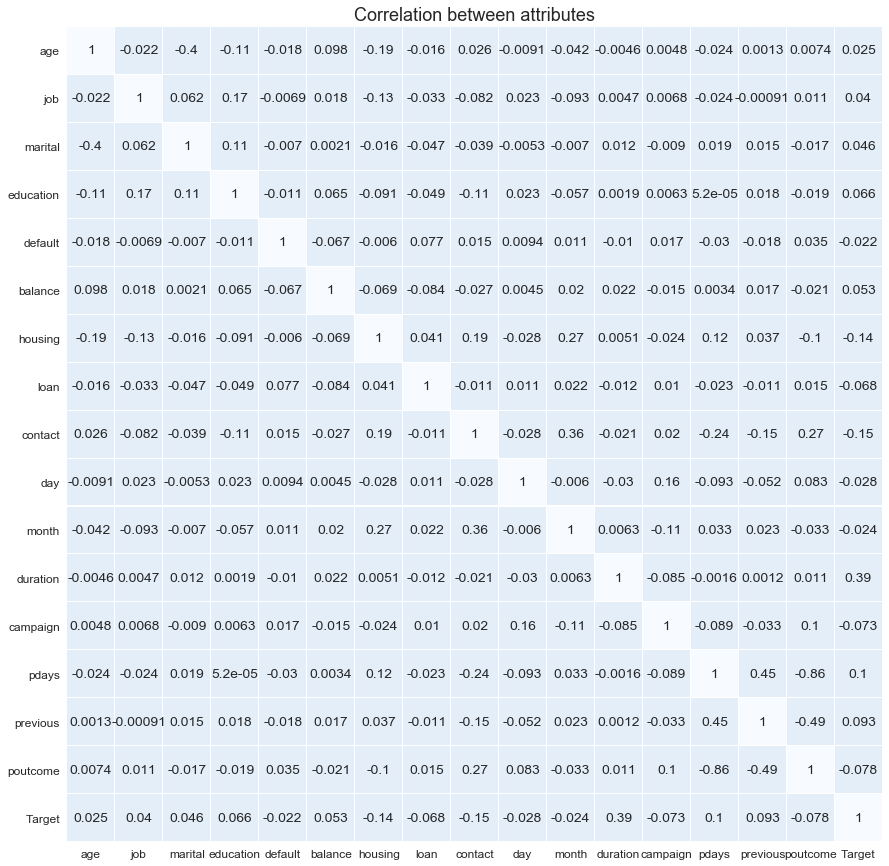

In [42]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8,cmap='Blues_r', annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=12)

In [43]:
#split data X and Y
X=bank_data.loc[:,bank_data.columns!='Target']
y=bank_data.loc[:,bank_data.columns=='Target']

In [44]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

### Decision Tree Model

In [45]:
#Fit, predict                             
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100 )

dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)


In [46]:
#Evaluate the model using accuracy and confusion matrix
acc_DT=metrics.accuracy_score(y_test, y_predict)
print('Accuracy DT: ',acc_DT)
print('Confusion Matrix DT: \n',metrics.confusion_matrix(y_test, y_predict))


Accuracy DT:  0.874668239457
Confusion Matrix DT: 
 [[11100   869]
 [  831   764]]


### Random Forest Classifier

In [47]:
#fit, predict
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,random_state=100)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)

C:\Users\Ines\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
#Evaluate the model using accuracy and confusion matrix
acc_RF=metrics.accuracy_score(y_test , y_predict)
print('Accuracy using Random forest: ',acc_RF)
print('Confusion Matrix Random Forest: \n',metrics.confusion_matrix(y_test, y_predict))

Accuracy using Random forest:  0.902683574167
Confusion Matrix Random Forest: 
 [[11568   401]
 [  919   676]]


### Ensemble Learning Adaboost

In [49]:
#Fit, predict
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=100,random_state=100)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)

C:\Users\Ines\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
#Evaluate the model using accuracy and confusion matrix
acc_AB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using AdaBoosting: ',acc_AB)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict))

Accuracy using AdaBoosting:  0.872382777942
Confusion Matrix: 
 [[11063   906]
 [  825   770]]
